In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("AllInput.csv") 

In [5]:
data[1:4]

,State,Party,SenatorName,Votes,% Votes,Wiki?,Google?,Newapi?,DOB,Education1,...,OrgsOfInfluence?,#Events,EventsOfImportance?,WikiCareerSuccessScore,WikiGeneric,#Articles,ArticleInfluenceScore,#PostiveArticles,#NegativeArticles,#NeutralArticles
1,California,Democratic,Loretta Sanchez,1416203,0.188517,Yes,Yes,Yes,21922.0,Chapman University,...,NaN,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
2,California,Republican,Duf Sundheim,584251,0.077772,Yes,No,No,19339.0,Stanford University,...,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,California,Republican,Phil Wyman,352821,0.046966,Yes,Yes,Yes,16469.0,"University of california, Davis",...,NaN,3,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN


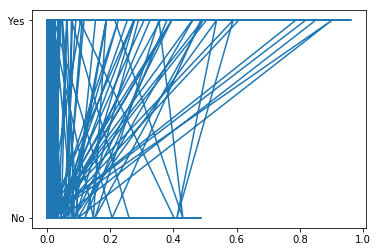

In [6]:
plt.plot(data['% Votes'],data['Google?'])

In [7]:
selectdata = data[['SenatorName','% Votes','Wiki?','Google?','Occupation1',' #Orgs','#Events','#Articles']]

In [8]:
selectdata[1:2]

,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
1,Loretta Sanchez,0.188517,Yes,Yes,Politician,3,3,6


In [9]:
import seaborn as sns

In [10]:
sns.set(style="ticks")

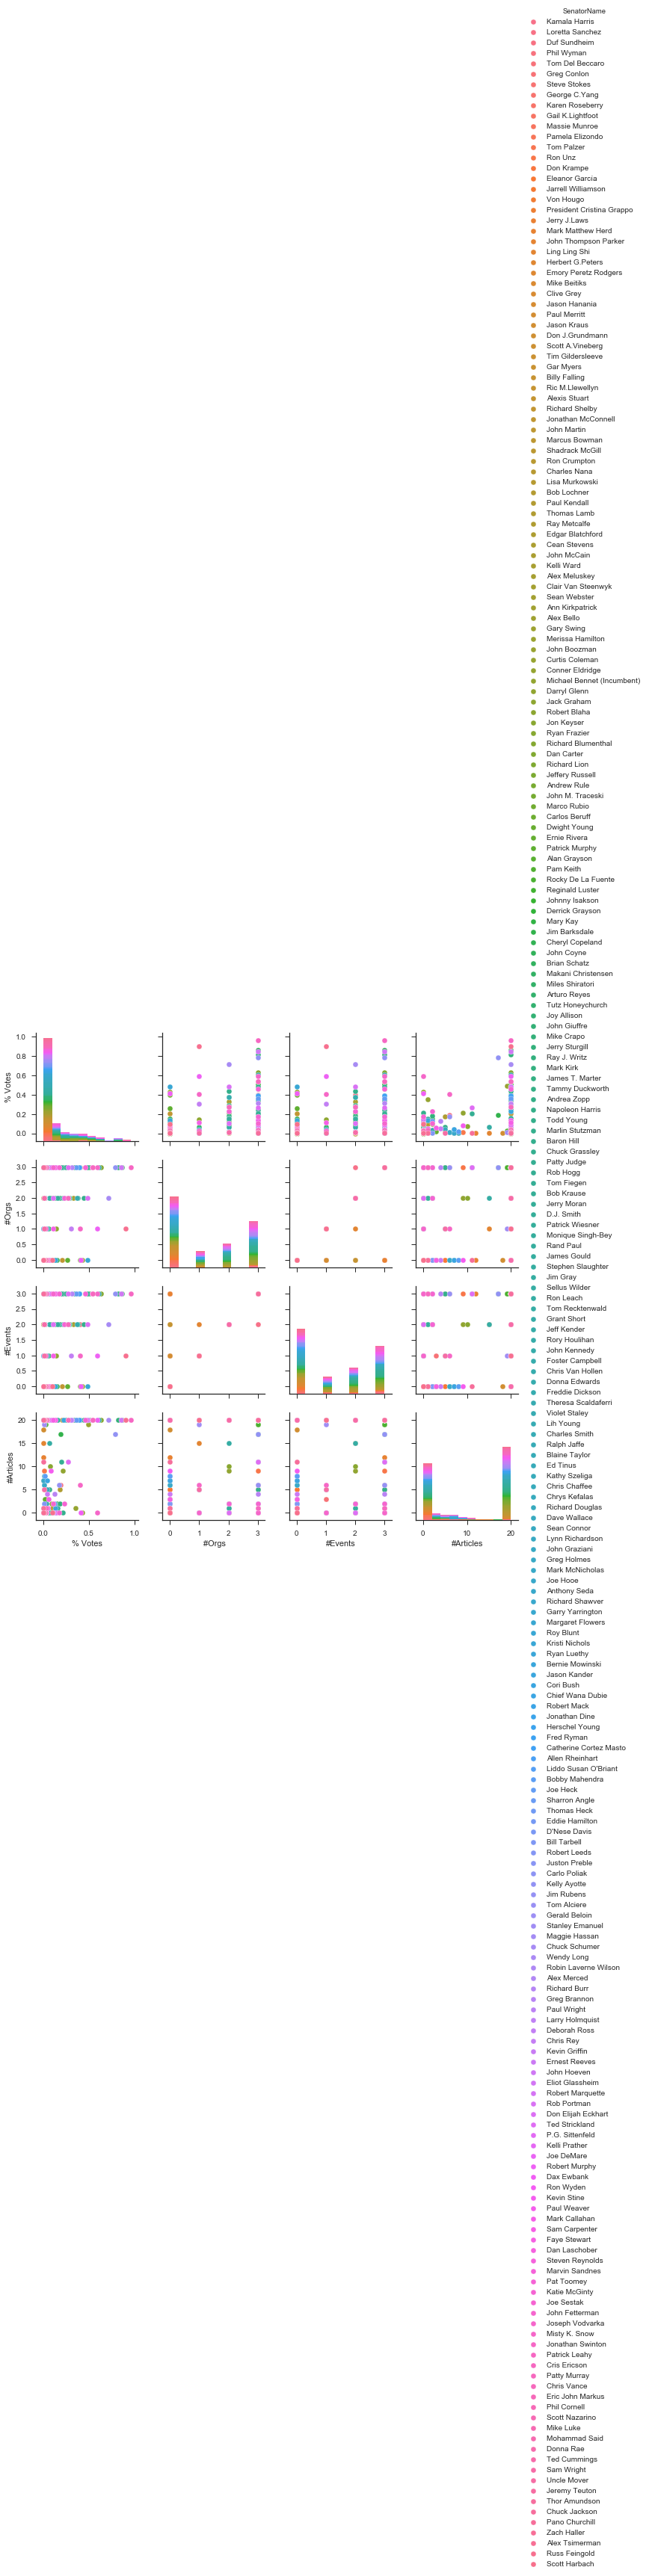

In [11]:
sns.pairplot(selectdata, hue="SenatorName")

In [12]:
selectdatacluster = selectdata.drop(['% Votes','Occupation1','Wiki?','Google?','SenatorName'], axis=1)

In [13]:
import random
random.uniform(0, 1)

0.5820307350691666

In [14]:
testcluster

NameError: name 'testcluster' is not defined

In [33]:
testcluster = np.array(selectdatacluster,dtype=float)

for i in range(0,len(testcluster)):
    testcluster[i][0] = float(testcluster[i][0]) + random.uniform(0, 0.5)
    testcluster[i][1] = testcluster[i][1] + random.uniform(0, 0.5)
    testcluster[i][2] = testcluster[i][2] + random.uniform(0, 0.5)

In [34]:
len(selectdatacluster)

244

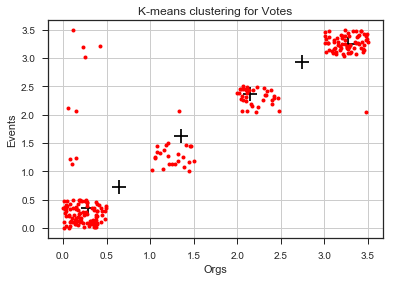

In [38]:
from sklearn.cluster import KMeans
import random

# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization
        n_clusters=6,  # number of clusters
        n_init=1,       # number of different times to run k-means
        n_jobs=-1)

kmeans.fit(testcluster)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(testcluster[:, 0], testcluster[:, 1], 'r.', markersize=8) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for Votes')
plt.xlabel('Orgs')
plt.ylabel('Events')
plt.grid()
plt.show()

In [39]:
selectdatacluster = selectdatacluster.astype(float)

In [40]:
selectdatacluster.head()

,#Orgs,#Events,#Articles
0,3.0,2.0,20.0
1,3.0,3.0,6.0
2,0.0,0.0,0.0
3,0.0,3.0,5.0
4,0.0,3.0,0.0


In [41]:
selectdatacluster[0:1]

,#Orgs,#Events,#Articles
0,3.0,2.0,20.0


In [42]:
from sklearn.cluster import KMeans
import random
#len(selectdatacluster)
for i in range(0,len(selectdatacluster)):
    #print()
    selectdatacluster[i:i+1] = selectdatacluster[i:i+1] + random.uniform(0, 0.25)
    #selectdatacluster[:i]['#Events'] = selectdatacluster[:i]['#Events'] + random.uniform(0, 0.25)
    #selectdatacluster[:i]['#Articles'] = selectdatacluster[:i]['#Articles'] + random.uniform(0, 0.25)
    
    

In [43]:
selectdatacluster[0:3]

,#Orgs,#Events,#Articles
0,3.073528,2.073528,20.073528
1,3.218105,3.218105,6.218105
2,0.035571,0.035571,0.035571


In [44]:
selectdata

,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
0,Kamala Harris,0.399436,Yes,Yes,Politician,3,2,20
1,Loretta Sanchez,0.188517,Yes,Yes,Politician,3,3,6
2,Duf Sundheim,0.077772,Yes,No,Politician,0,0,0
3,Phil Wyman,0.046966,Yes,Yes,Politician,0,3,5
4,Tom Del Beccaro,0.043078,Yes,Yes,Politician,0,3,0
5,Greg Conlon,0.030742,No,Yes,NaN,0,1,3
6,Steve Stokes,0.022470,No,Yes,NaN,0,3,20
7,George C.Yang,0.014916,No,No,NaN,0,0,0
8,Karen Roseberry,0.014717,No,No,NaN,0,0,0
9,Gail K.Lightfoot,0.013280,No,No,NaN,0,0,0


In [45]:
df = selectdata['% Votes'] *100
#df.head()

df2 = selectdata
df2['% Votes'] = df
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
0,Kamala Harris,39.943562,Yes,Yes,Politician,3,2,20
1,Loretta Sanchez,18.851734,Yes,Yes,Politician,3,3,6
2,Duf Sundheim,7.777236,Yes,No,Politician,0,0,0
3,Phil Wyman,4.696564,Yes,Yes,Politician,0,3,5
4,Tom Del Beccaro,4.307776,Yes,Yes,Politician,0,3,0


In [46]:
df3 = df2[' #Orgs'].astype(float)
df2[' #Orgs'] = df3
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
0,Kamala Harris,39.943562,Yes,Yes,Politician,3.0,2,20
1,Loretta Sanchez,18.851734,Yes,Yes,Politician,3.0,3,6
2,Duf Sundheim,7.777236,Yes,No,Politician,0.0,0,0
3,Phil Wyman,4.696564,Yes,Yes,Politician,0.0,3,5
4,Tom Del Beccaro,4.307776,Yes,Yes,Politician,0.0,3,0


In [47]:
df3 = df2['#Events'].astype(float)
df2['#Events'] = df3
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
0,Kamala Harris,39.943562,Yes,Yes,Politician,3.0,2.0,20
1,Loretta Sanchez,18.851734,Yes,Yes,Politician,3.0,3.0,6
2,Duf Sundheim,7.777236,Yes,No,Politician,0.0,0.0,0
3,Phil Wyman,4.696564,Yes,Yes,Politician,0.0,3.0,5
4,Tom Del Beccaro,4.307776,Yes,Yes,Politician,0.0,3.0,0


In [48]:
df3 = df2['#Articles'].astype(float)
df2['#Articles'] = df3
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
0,Kamala Harris,39.943562,Yes,Yes,Politician,3.0,2.0,20.0
1,Loretta Sanchez,18.851734,Yes,Yes,Politician,3.0,3.0,6.0
2,Duf Sundheim,7.777236,Yes,No,Politician,0.0,0.0,0.0
3,Phil Wyman,4.696564,Yes,Yes,Politician,0.0,3.0,5.0
4,Tom Del Beccaro,4.307776,Yes,Yes,Politician,0.0,3.0,0.0


In [49]:
df2[1:2][' #Orgs'] + random.uniform(0, 0.25)

1    3.128933
Name:  #Orgs, dtype: float64

In [50]:
df2[' #Orgs'] = selectdatacluster[' #Orgs']
df2['#Events'] = selectdatacluster['#Events']
df2['#Articles'] = selectdatacluster['#Articles']
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
0,Kamala Harris,39.943562,Yes,Yes,Politician,3.073528,2.073528,20.073528
1,Loretta Sanchez,18.851734,Yes,Yes,Politician,3.218105,3.218105,6.218105
2,Duf Sundheim,7.777236,Yes,No,Politician,0.035571,0.035571,0.035571
3,Phil Wyman,4.696564,Yes,Yes,Politician,0.007351,3.007351,5.007351
4,Tom Del Beccaro,4.307776,Yes,Yes,Politician,0.098288,3.098288,0.098288


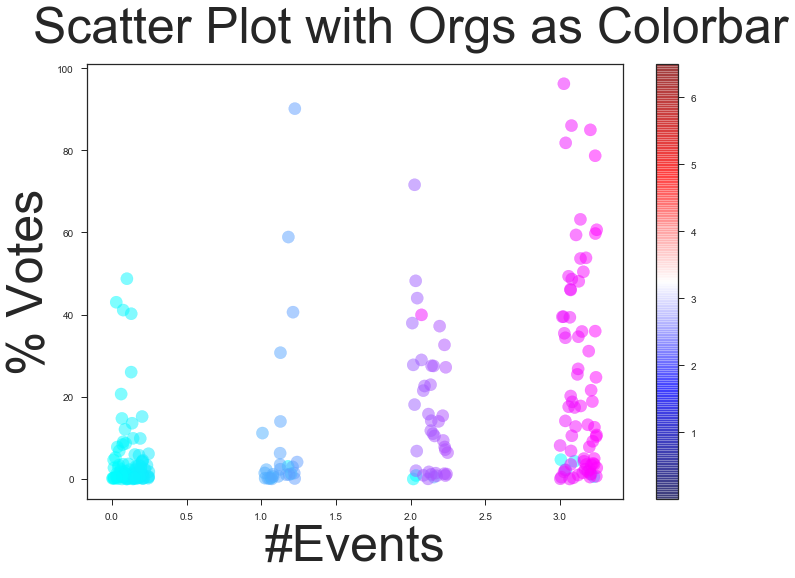

In [108]:
np.random.seed(19680801)
fig = plt.figure(figsize=(12,8))
colors = df2[' #Orgs']

N = 50
#colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# c=colors,
plt.scatter(df2['#Events'], df2['% Votes'], s=150,alpha=0.5, c = colors, cmap='cool')
fig.suptitle('Scatter Plot with Orgs as Colorbar',fontsize = 50)
plt.xlabel('#Events',fontsize = 50)
plt.ylabel('% Votes',fontsize = 50)

plt.colorbar(scatter)
plt.show()

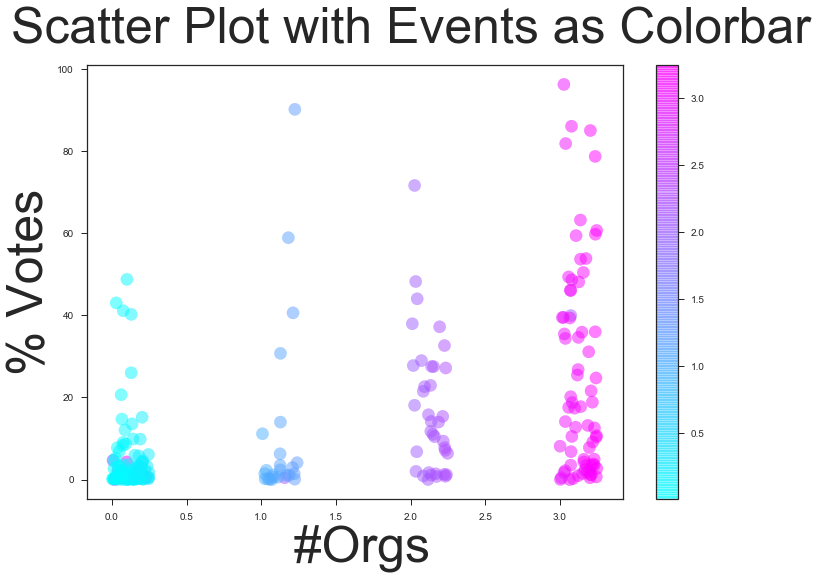

In [81]:
import matplotlib.cm as cm
np.random.seed(196801)

# c=colors,'#5fd0e6'
colors = df2['#Events']
fig = plt.figure(figsize=(12,8))
#print(colors)
scatter = plt.scatter(df2[' #Orgs'], df2['% Votes'], s=150,alpha=0.5, c=colors,cmap='cool')
fig.suptitle('Scatter Plot with Events as Colorbar', fontsize=50)
plt.ylabel('% Votes', fontsize = 50)
plt.xlabel(' #Orgs', fontsize = 50)

plt.colorbar(scatter)
plt.show()

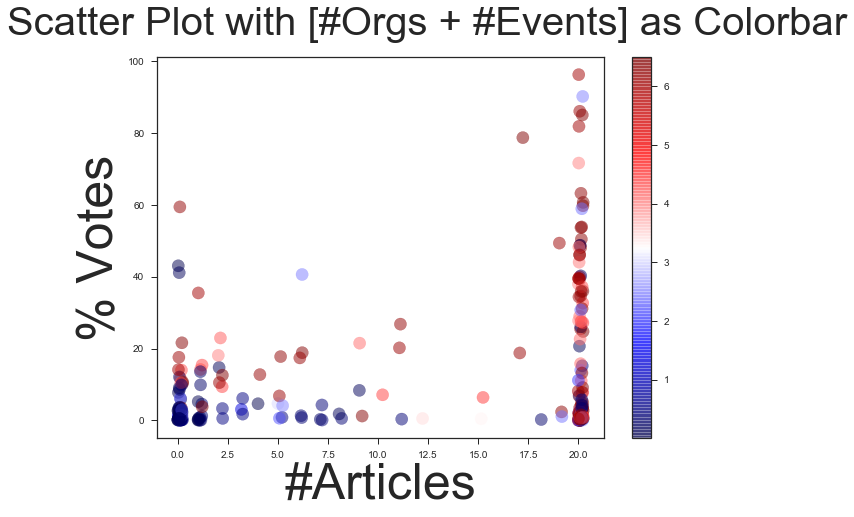

In [104]:
np.random.seed(196801)
# c=colors,'#5fd0e6'
colors = df2[' #Orgs']+df2['#Events']
fig = plt.figure(figsize=(10,7))

scatter = plt.scatter(df2['#Articles'], df2['% Votes'], s=150,alpha=0.5, c= colors,cmap='seismic')
fig.suptitle('Scatter Plot with [#Orgs + #Events] as Colorbar', fontsize=40)
plt.ylabel('% Votes', fontsize=50)
plt.xlabel('#Articles', fontsize=50)

plt.colorbar(scatter)
plt.show()

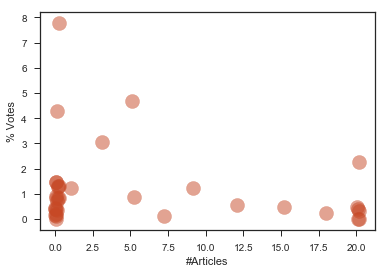

In [178]:
np.random.seed(196801)
# c=colors,
plt.scatter(df2['#Articles'], df2['% Votes'], s=200,alpha=0.5, c='#c74926')
fig.suptitle('Scatter Plot')
plt.ylabel('% Votes')
plt.xlabel('#Articles')
plt.show()

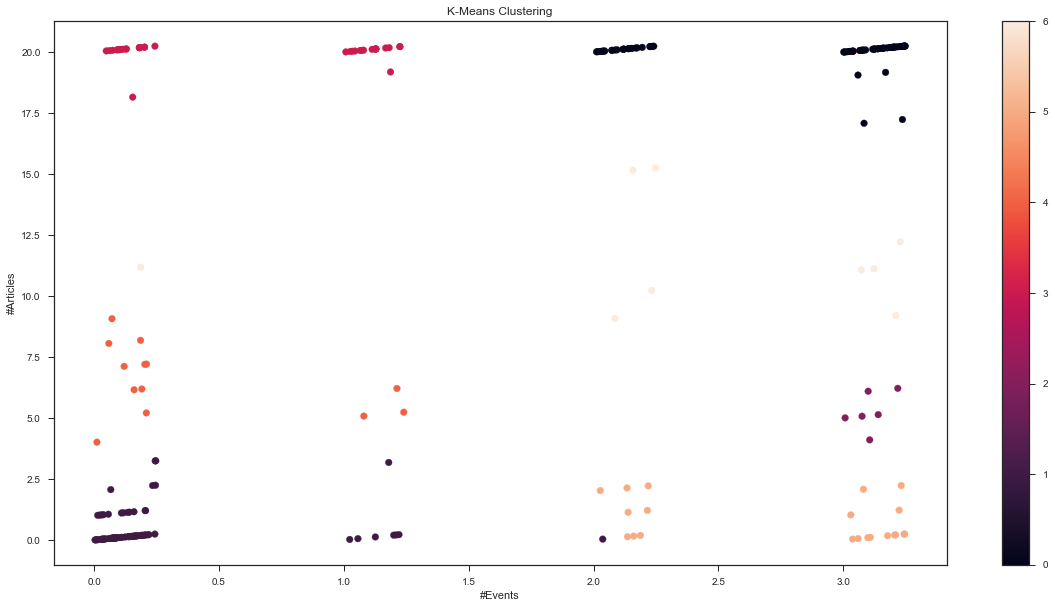

In [109]:
def doKmeans(X, nclust=3):
  model = KMeans(nclust)
  model.fit(X)
  clust_labels = model.predict(X)
  cent = model.cluster_centers_
  return (clust_labels, cent)

clust_labels, cent = doKmeans(selectdatacluster,7)
kmeans = pd.DataFrame(clust_labels)
#selectdatacluster.insert((selectdatacluster.shape[1]),'kmeans',kmeans)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(selectdatacluster['#Events'],selectdatacluster['#Articles'],
  c=kmeans[0],s=45)
ax.set_title('K-Means Clustering')
ax.set_xlabel('#Events')
ax.set_ylabel('#Articles')
plt.colorbar(scatter)


In [110]:
selectdatacluster.drop('kmeans',axis=1)

ValueError: labels ['kmeans'] not contained in axis

In [111]:
selectdatacluster

,#Orgs,#Events,#Articles
0,3.073528,2.073528,20.073528
1,3.218105,3.218105,6.218105
2,0.035571,0.035571,0.035571
3,0.007351,3.007351,5.007351
4,0.098288,3.098288,0.098288
5,0.179809,1.179809,3.179809
6,0.040131,3.040131,20.040131
7,0.138814,0.138814,0.138814
8,0.083412,0.083412,0.083412
9,0.144734,0.144734,0.144734


In [112]:
selectdata = data[['SenatorName','% Votes','Wiki?','Google?','Occupation1',' #Orgs','#Events','#Articles']]

In [113]:
selectdata
type(selectdata)

pandas.core.frame.DataFrame

In [114]:
selectdata.head()
df_select = selectdata
df_select.head()

,SenatorName,% Votes,Wiki?,Google?,Occupation1,#Orgs,#Events,#Articles
0,Kamala Harris,0.399436,Yes,Yes,Politician,3,2,20
1,Loretta Sanchez,0.188517,Yes,Yes,Politician,3,3,6
2,Duf Sundheim,0.077772,Yes,No,Politician,0,0,0
3,Phil Wyman,0.046966,Yes,Yes,Politician,0,3,5
4,Tom Del Beccaro,0.043078,Yes,Yes,Politician,0,3,0


In [115]:
df_select.rename(columns={'Wiki?':'Wiki'},inplace=True)
df_select.rename(columns={'Google?':'Google'},inplace=True)
df_select.rename(columns={'% Votes':'Votes'},inplace=True)

df_select.rename(columns={' #Orgs':'NumOrgs'},inplace=True)
df_select.rename(columns={'#Events':'NumEvents'},inplace=True)
df_select.rename(columns={'#Articles':'NumArticles'},inplace=True)

df_select.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,SenatorName,Votes,Wiki,Google,Occupation1,NumOrgs,NumEvents,NumArticles
0,Kamala Harris,0.399436,Yes,Yes,Politician,3,2,20
1,Loretta Sanchez,0.188517,Yes,Yes,Politician,3,3,6
2,Duf Sundheim,0.077772,Yes,No,Politician,0,0,0
3,Phil Wyman,0.046966,Yes,Yes,Politician,0,3,5
4,Tom Del Beccaro,0.043078,Yes,Yes,Politician,0,3,0


In [116]:
#df_select.Wiki.replace(('yes', 'no'), (1, 0,), inplace=True)
#> 30 = 1; 10-30 = 2; 5-10 = 3; 0-5 = 4
#pd.cut(df_select['Votes'], bins=[0, 5, 10, 30], include_lowest=True)
#df_select['Votes'] = pd.cut(df_select['Votes'], bins=[0, 0.05, 0.10, 0.30, 1], include_lowest=True, labels=['0', '1', '2', '3'])

In [117]:
df_select.head()
df1 = df_select

In [118]:
df1 = df_select
df1.head()

,SenatorName,Votes,Wiki,Google,Occupation1,NumOrgs,NumEvents,NumArticles
0,Kamala Harris,0.399436,Yes,Yes,Politician,3,2,20
1,Loretta Sanchez,0.188517,Yes,Yes,Politician,3,3,6
2,Duf Sundheim,0.077772,Yes,No,Politician,0,0,0
3,Phil Wyman,0.046966,Yes,Yes,Politician,0,3,5
4,Tom Del Beccaro,0.043078,Yes,Yes,Politician,0,3,0


In [119]:
df1['Wiki'] = df1.Wiki.map(dict(Yes=1, No=0))
df1['Google'] = df1.Google.map(dict(Yes=1, No=0))
df1.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SenatorName,Votes,Wiki,Google,Occupation1,NumOrgs,NumEvents,NumArticles
0,Kamala Harris,0.399436,1,1,Politician,3,2,20
1,Loretta Sanchez,0.188517,1,1,Politician,3,3,6
2,Duf Sundheim,0.077772,1,0,Politician,0,0,0
3,Phil Wyman,0.046966,1,1,Politician,0,3,5
4,Tom Del Beccaro,0.043078,1,1,Politician,0,3,0
5,Greg Conlon,0.030742,0,1,NaN,0,1,3
6,Steve Stokes,0.022470,0,1,NaN,0,3,20
7,George C.Yang,0.014916,0,0,NaN,0,0,0
8,Karen Roseberry,0.014717,0,0,NaN,0,0,0
9,Gail K.Lightfoot,0.013280,0,0,NaN,0,0,0


In [120]:
df1.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
SenatorName    244 non-null object
Votes          244 non-null float64
Wiki           244 non-null int64
Google         244 non-null int64
Occupation1    5 non-null object
NumOrgs        244 non-null int64
NumEvents      244 non-null int64
NumArticles    244 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 15.3+ KB


In [121]:
#One-hot encoding 
#Useful link: http://pbpython.com/categorical-encoding.html
df2 = df1
df2 = df2.drop(['SenatorName','Occupation1'], axis=1)
df2.head()
#df2 = pd.get_dummies(df1, columns=["SenatorName", "Occupation1"], prefix=["Senator", "Occ"]).head()

,Votes,Wiki,Google,NumOrgs,NumEvents,NumArticles
0,0.399436,1,1,3,2,20
1,0.188517,1,1,3,3,6
2,0.077772,1,0,0,0,0
3,0.046966,1,1,0,3,5
4,0.043078,1,1,0,3,0


In [122]:
#df2['Votes'] = df2['Votes'].astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
Votes          244 non-null float64
Wiki           244 non-null int64
Google         244 non-null int64
NumOrgs        244 non-null int64
NumEvents      244 non-null int64
NumArticles    244 non-null int64
dtypes: float64(1), int64(5)
memory usage: 11.5 KB


### Random Forest

In [123]:
#https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/
#Using H20
#https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/gbm-randomforest/GBM_RandomForest_Example.py
# Example from the Git shows H2O implementation of Random forest that would not need one-hot encoding
#import h2o
#import os

#Other useful Links: https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/


In [124]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Votes' in df2:
    y = df2['Votes'].values # get the labels we want
    #del df_select['elf'] # get rid of the class label
    X= df2[df2.columns.difference(['Votes'])].values
    #X = df_select.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
# create cross validation iterator
#cv_object = ShuffleSplit(n_splits=2)

CPU times: user 1.74 ms, sys: 1.25 ms, total: 3 ms
Wall time: 2.24 ms


In [125]:
#https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [126]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [136]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.192
Test data R-2 score: 0.237
Test data Spearman correlation: 0.395
Test data Pearson correlation: 0.494


In [137]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, predicted_test))

0.03409929548864095


In [138]:
import math

print(math.sqrt(0.0041227453111599656)*7512322)

print(((7512322-482355.7367047406)/7512322)*100)

482355.7367047406
93.57913922346857


In [175]:
d = {'Actual %Votes': y_test*100, 'Predicted %Votes':predicted_test*100,'Type' : 'Test'}
results = pd.DataFrame(data=d)
results
dtrain = {'Actual %Votes': y_train*100, 'Predicted %Votes':predicted_train*100, 'Type' : 'Train' }
results2=pd.DataFrame(data=dtrain)
results2

,Actual %Votes,Predicted %Votes,Type
0,3.354522,3.583532,Train
1,8.370354,5.490770,Train
2,0.058615,2.623510,Train
3,2.328988,4.074654,Train
4,50.428573,30.199135,Train
5,0.018879,0.707635,Train
6,6.860100,14.850713,Train
7,1.207855,4.927087,Train
8,90.137220,28.182144,Train
9,0.236370,4.074654,Train


In [140]:
d = results.drop([1,])

In [141]:
d = d.drop([2,])
d.head()

,Actual %Votes,Predicted %Votes
0,0.419111,4.074654
3,11.172376,28.182144
4,0.892557,4.927087
5,0.280403,4.074654
6,30.736622,28.182144


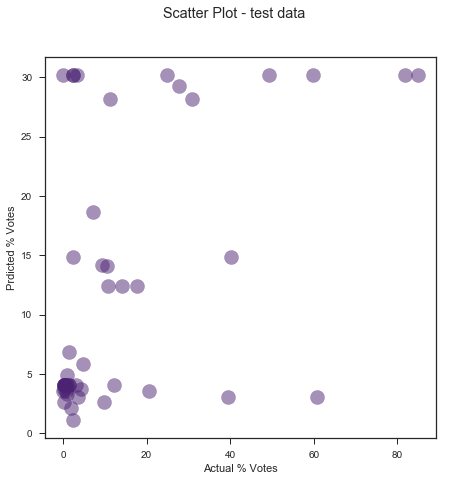

In [159]:
np.random.seed(19601)
# c=colors,
fig = plt.figure(figsize=(7,7))
plt.scatter(d['Actual %Votes'], d['Predicted %Votes'], s=200,alpha=0.5, c='#4c2373')
fig.suptitle('Scatter Plot - test data')
plt.ylabel('Prdicted % Votes')
plt.xlabel('Actual % Votes')
plt.show()

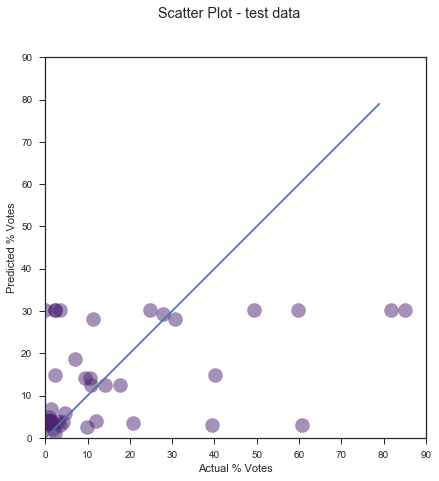

49

In [160]:
np.random.seed(19601)
# c=colors,
fig = plt.figure(figsize=(7,7))
plt.scatter(results['Actual %Votes'], results['Predicted %Votes'], s=200,alpha=0.5, c='#4c2373')
fig.suptitle('Scatter Plot - test data')
plt.ylabel('Predicted % Votes')
plt.xlabel('Actual % Votes')

plt.plot(range(80))
plt.xlim(0, 90)
plt.ylim(0, 90)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()
len(results)

In [176]:
resultsall =  pd.concat([results, results2], ignore_index=True)

In [184]:
resultsall['Type'][0]

'Test'

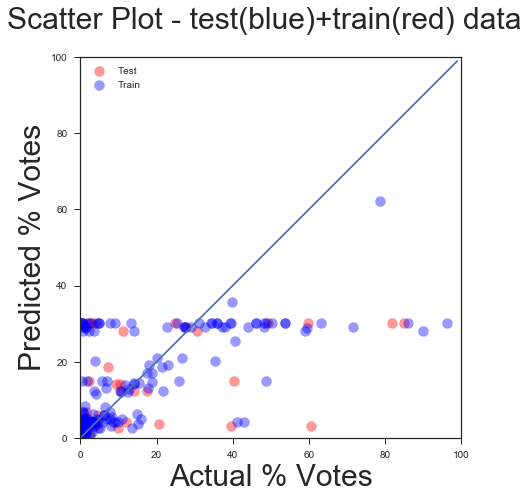

49

In [224]:
np.random.seed(19601)


fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(1,1,1)

#Plot something

ax.scatter(results['Actual %Votes'], results['Predicted %Votes'], s=100,alpha=0.4, c= 'red',label="Test")
ax.scatter(results2['Actual %Votes'], results2['Predicted %Votes'], s=100,alpha=0.4, c= 'blue',label="Train")


ax.legend()

fig.suptitle('Scatter Plot - test(blue)+train(red) data',fontsize=30)
plt.ylabel('Predicted % Votes',fontsize=30)
plt.xlabel('Actual % Votes',fontsize=30)

plt.plot(range(100))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()
len(results)

### Hyperparameter optmization

In [ ]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
X = bank_regression['X']
y = bank_regression['y']
#seed=0
#n_splits = 4
#yhat = np.zeros(y.shape)
#cv = KFold(n_splits=n_splits, random_state=seed)

for max_depth in range(1, 100)[::20]:
  for train_index, test_index in cv.split(X, y):
  clf = RandomForestRegressor(max_depth=max_depth, n_estimators=5, random_state=seed, n_jobs=2)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf.fit(X_train, y_train)
  yhat[test_index] = clf.predict(X_test)
  print("max_depth: %.f, MSE: %.f, R^2: %0.4f" % (max_depth, mean_squared_error(y, yhat), r2_score(y, yhat)))

In [39]:
from sklearn import metrics as mt

total_accuracy = mt.accuracy_score(y_test, predicted_test)
print(total_accuracy)

ValueError: continuous is not supported

### METHOD 2 for Random Forest

In [41]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Votes' in df2:
    y = df2['Votes'].values # get the labels we want
    #del df_select['elf'] # get rid of the class label
    X= df2[df2.columns.difference(['Votes'])].values
    #X = df_select.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
# create cross validation iterator
cv_object = StratifiedKFold(n_splits=2)

CPU times: user 1.27 ms, sys: 68 µs, total: 1.33 ms
Wall time: 1.28 ms


In [40]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
## X_train , y_train , X_test, y_test (they were set in a for loop above)

for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

NameError: name 'cv_object' is not defined

In [143]:
X_train

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 6, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 5, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [140]:
print(train_indices, test_indices)

[2 1 4 3] [0]


In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)  # train object
y_hat = RFR.predict(X_test)

In [142]:
total_accuracy = mt.accuracy_score(y_test, y_hat)
print ('RandomForest', total_accuracy)
conf = mt.confusion_matrix(y_test,y_hat)
print(conf)
print(classification_report(y_test, y_hat8))

RandomForest 0.0
[[0 0]
 [1 0]]


NameError: name 'classification_report' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2,
...                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

print(regr.feature_importances_)
#[ 0.17339552  0.81594114  0.          0.01066333]
print(regr.predict([[0, 0, 0, 0]]))
#[-2.50699856]

#### KNN

In [60]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Votes' in df_select:
    y = df_select['Votes'].values # get the labels we want
    #del df_select['elf'] # get rid of the class label
    X= df_select[df_select.columns.difference(['Votes'])].values
    #X = df_select.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
# create cross validation iterator
cv_object = StratifiedKFold(n_splits=2)

CPU times: user 1.65 ms, sys: 156 µs, total: 1.8 ms
Wall time: 1.7 ms


In [64]:
cv_object
X

array([[3, 20, 2, 'Yes', 'Politician', 'Kamala+Harris', 'Yes'],
       [3, 6, 3, 'Yes', 'Politician', 'Loretta+Sanchez', 'Yes'],
       [0, 0, 0, 'No', 'Politician', 'Duf+Sundheim', 'Yes'],
       [0, 5, 3, 'Yes', 'Politician', 'Phil+Wyman', 'Yes'],
       [0, 0, 3, 'Yes', 'Politician', 'Tom+Del+Beccaro', 'Yes'],
       [0, 3, 1, 'Yes', nan, 'Greg+Conlon', 'No'],
       [0, 20, 3, 'Yes', nan, 'Steve+Stokes', 'No'],
       [0, 0, 0, 'No', nan, 'George+C.Yang', 'No'],
       [0, 0, 0, 'No', nan, 'Karen+Roseberry', 'No'],
       [0, 0, 0, 'No', nan, 'Gail+K.Lightfoot', 'No'],
       [0, 0, 0, 'No', nan, 'Massie+Munroe', 'No'],
       [0, 0, 1, 'Yes', nan, 'Pamela+Elizondo', 'No'],
       [0, 1, 0, 'No', nan, 'Tom+Palzer', 'No'],
       [3, 9, 3, 'Yes', nan, 'Ron+Unz', 'No'],
       [0, 0, 0, 'No', nan, 'Don+Krampe', 'No'],
       [0, 5, 0, 'No', nan, 'Eleanor+García', 'No'],
       [0, 0, 2, 'Yes', nan, 'Jarrell+Williamson', 'No'],
       [0, 0, 0, 'No', nan, 'Von+Hougo', 'No'],
       [0

In [62]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
## X_train , y_train , X_test, y_test (they were set in a for loop above)

for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


ValueError: could not convert string to float: 'No'